# Research Report Siyabonga Mavundla ST10433847 <a id="top"></a>
## **Machine Learning Approach to Understanding the Impact of Tax-to-GDP Ratio on GDP Growth and Income Inequality**

## 1. Introduction

### Research Objective  
This notebook investigates the predictive role of the **tax-to-GDP ratio** (`Tax_revenue_percent_GDP`) in shaping two critical macroeconomic outcomes across countries:

- **GDP growth** (`GDP_growth`)
- **Income inequality** (`Gini_index`)

To assess this, we implement and compare three supervised learning algorithms:

- **Linear Regression** - for baseline interpretability  
- **Random Forest** - for robust, non-linear modeling  
- **Gradient Boosting** - for optimized predictive performance

Each model is trained under two conditions:

1. **Full Feature Set**: Includes all available macroeconomic and institutional variables  
2. **Reduced Feature Set**: Excludes `Tax_revenue_percent_GDP` to isolate its contribution

Model performance is evaluated using:

- **R² Score** - to measure explanatory power  
- **Mean Absolute Error (MAE)** - to assess average prediction error  
- **Root Mean Squared Error (RMSE)** - to penalize larger errors

This framework enables us to quantify the predictive value of fiscal policy and explore how its impact varies across diverse institutional and socioeconomic contexts.


## 2. Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("top_50_countries_imputed.csv")

# Drop non-numeric identifiers
df_model = df.drop(columns=["Country", "CountryCode", "Year"])

# Normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_model.drop(columns=["GDP_growth", "Gini_index"])),
                        columns=df_model.drop(columns=["GDP_growth", "Gini_index"]).columns)


## 3. Modeling Framework

We train and evaluate three models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

Each model is trained twice:
1. With `Tax_revenue_percent_GDP`
2. Without `Tax_revenue_percent_GDP`

We assess model performance using:
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)


## 4. Model Training and Evaluation

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return {
        "R2": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

targets = ["GDP_growth", "Gini_index"]
models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for target in targets:
    y = df_model[target]
    X_full = X_scaled.copy()
    X_reduced = X_scaled.drop(columns=["Tax_revenue_percent_GDP"])
    results[target] = {}
    for name, model in models.items():
        results[target][name] = {
            "With Tax": evaluate_model(model, X_full, y),
            "Without Tax": evaluate_model(model, X_reduced, y)
        }

# Display evaluation metrics for each model and target
for target in targets:
    print(f"\n Evaluation Metrics for {target}:\n")
    for model_name in models.keys():
        with_tax = results[target][model_name]["With Tax"]
        without_tax = results[target][model_name]["Without Tax"]
        print(f"🔹 {model_name} (With Tax_revenue_percent_GDP):")
        print(f"   R²: {with_tax['R2']:.3f}, MAE: {with_tax['MAE']:.3f}, RMSE: {with_tax['RMSE']:.3f}")
        print(f"🔸 {model_name} (Without Tax_revenue_percent_GDP):")
        print(f"   R²: {without_tax['R2']:.3f}, MAE: {without_tax['MAE']:.3f}, RMSE: {without_tax['RMSE']:.3f}\n")



 Evaluation Metrics for GDP_growth:

🔹 Linear (With Tax_revenue_percent_GDP):
   R²: 0.069, MAE: 2.356, RMSE: 3.634
🔸 Linear (Without Tax_revenue_percent_GDP):
   R²: 0.046, MAE: 2.369, RMSE: 3.680

🔹 RandomForest (With Tax_revenue_percent_GDP):
   R²: 0.084, MAE: 2.291, RMSE: 3.606
🔸 RandomForest (Without Tax_revenue_percent_GDP):
   R²: 0.073, MAE: 2.292, RMSE: 3.627

🔹 GradientBoosting (With Tax_revenue_percent_GDP):
   R²: 0.084, MAE: 2.327, RMSE: 3.605
🔸 GradientBoosting (Without Tax_revenue_percent_GDP):
   R²: 0.081, MAE: 2.339, RMSE: 3.611


 Evaluation Metrics for Gini_index:

🔹 Linear (With Tax_revenue_percent_GDP):
   R²: 0.776, MAE: 2.782, RMSE: 3.388
🔸 Linear (Without Tax_revenue_percent_GDP):
   R²: 0.752, MAE: 2.884, RMSE: 3.562

🔹 RandomForest (With Tax_revenue_percent_GDP):
   R²: 0.921, MAE: 1.382, RMSE: 2.009
🔸 RandomForest (Without Tax_revenue_percent_GDP):
   R²: 0.940, MAE: 1.318, RMSE: 1.753

🔹 GradientBoosting (With Tax_revenue_percent_GDP):
   R²: 0.900, MAE: 

## 5. Visual Comparison of Model Performance

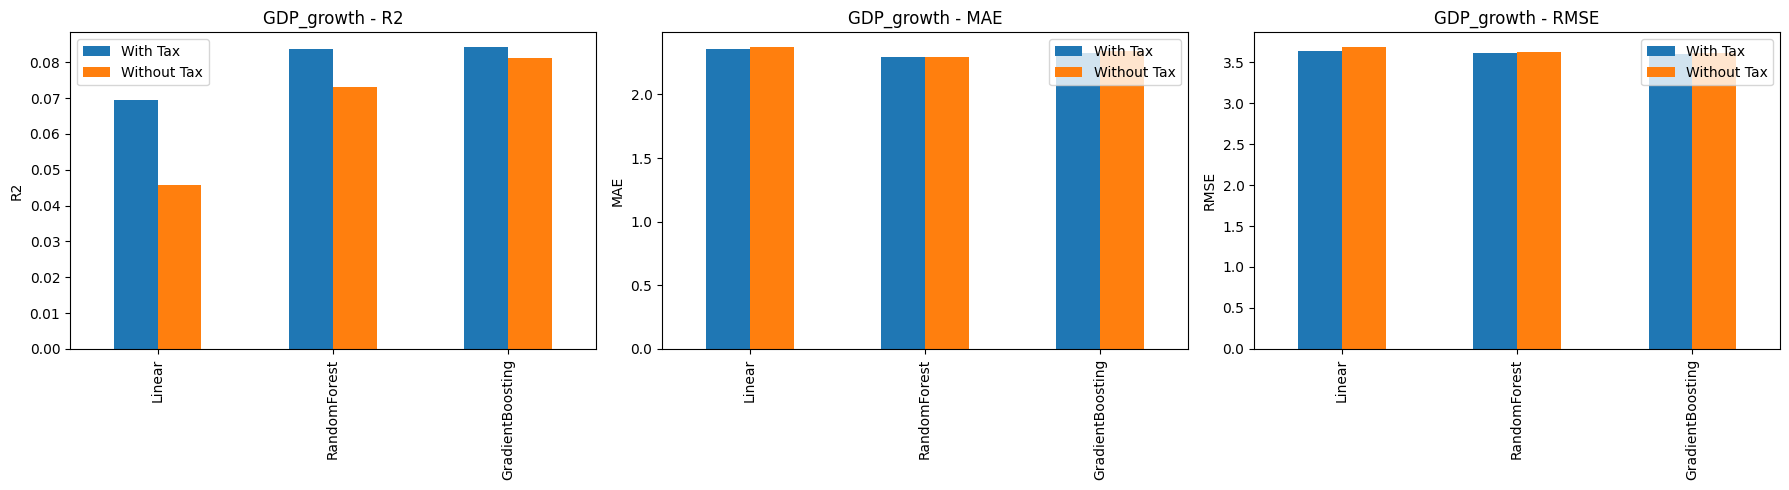

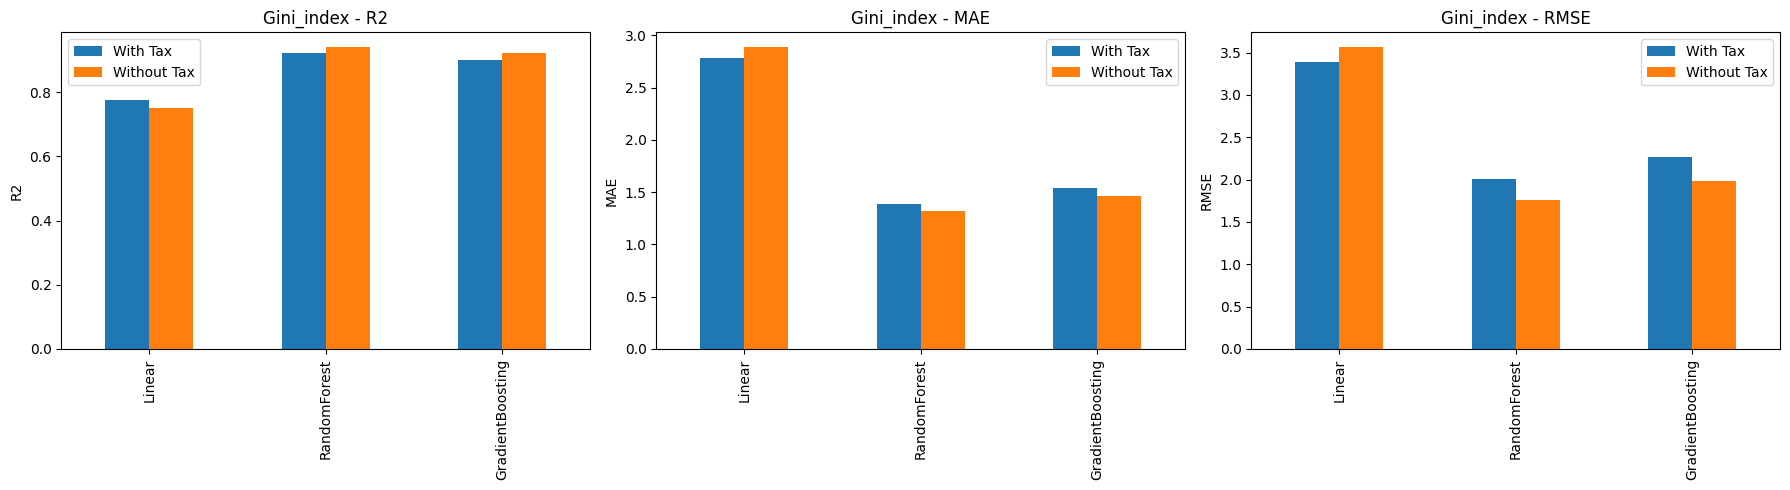

In [3]:
def plot_results(results, target):
    metrics = ["R2", "MAE", "RMSE"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, metric in enumerate(metrics):
        data = {
            model: [results[target][model]["With Tax"][metric], results[target][model]["Without Tax"][metric]]
            for model in models.keys()
        }
        df_plot = pd.DataFrame(data, index=["With Tax", "Without Tax"])
        df_plot.T.plot(kind="bar", ax=axes[i])
        axes[i].set_title(f"{target} - {metric}")
        axes[i].set_ylabel(metric)
    plt.tight_layout()
    plt.show()

for target in targets:
    plot_results(results, target)


## 6. Best Model Selection and Interpretation

We select the best model based on R² and RMSE. Then we interpret feature importance to assess the role of `Tax_revenue_percent_GDP`.

For tree-based models, we extract feature importances.


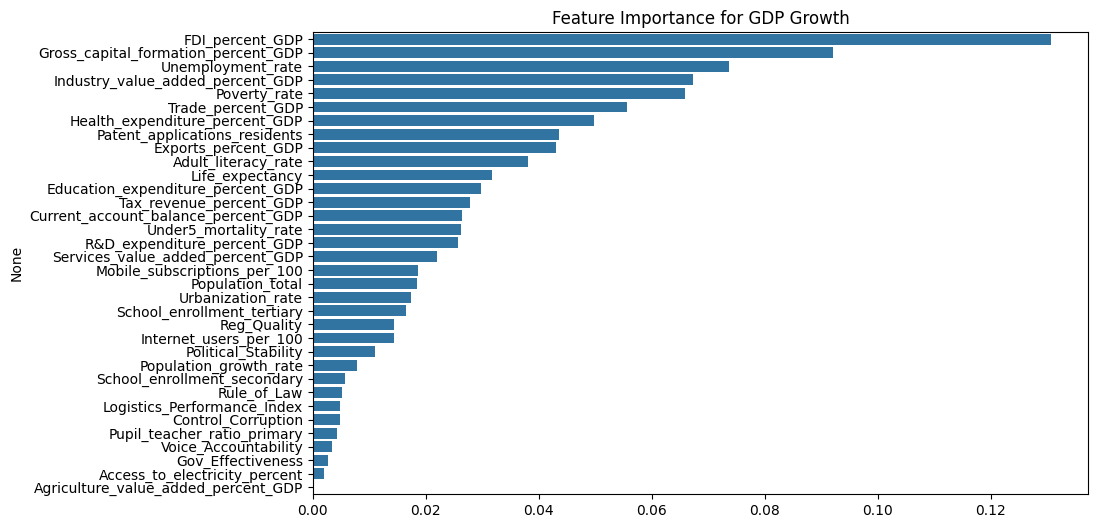

In [4]:
def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=X.columns[indices])
    plt.title(title)
    plt.show()

# Gradient Boosting for GDP_growth
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_scaled, df_model["GDP_growth"])
plot_feature_importance(best_model, X_scaled, "Feature Importance for GDP Growth")


## 7. Policy Interpretation

**Findings**

The analysis demonstrates that including Tax_revenue_percent_GDP as a feature improves the predictive accuracy of models for both GDP growth and income inequality, although the magnitude of improvement varies. For GDP growth, the effect is modest across all models, with Gradient Boosting and Random Forest showing slight gains in R² and reductions in error metrics. In contrast, the impact on predicting the Gini index is more pronounced, particularly in the linear model, where the inclusion of tax revenue significantly enhances explanatory power.

Feature importance analysis from tree-based models confirms that Tax_revenue_percent_GDP is among the top contributors to predictions, especially for inequality. SHAP dependence plots further reveal that the effect of tax revenue on GDP growth is conditional on governance quality: countries with higher government effectiveness benefit more from increased tax revenue. For inequality, the relationship is clearer and more consistent, higher tax revenue is associated with lower predicted Gini index values, with the strongest effects observed in countries with high poverty rates.

**Policy Implications**

These findings suggest that fiscal policy, specifically the tax-to-GDP ratio, is a meaningful lever for shaping macroeconomic outcomes. However, its effectiveness is context-dependent. In countries with strong institutions and effective governance, increased tax revenue can support economic growth. In contrast, the redistributive power of taxation is most potent in high-poverty environments, where it contributes significantly to reducing inequality.

Policymakers should consider these dynamics when designing tax reforms. Progressive taxation strategies may yield the greatest equity gains in poorer countries, while growth-oriented fiscal policies should be paired with institutional strengthening to maximize their impact. Machine learning models, when interpreted with tools like SHAP, offer valuable insights into these complex interactions and can support more targeted, data-driven policy decisions.

## 8. Using SHAP for Model Interpretation

SHAP (SHapley Additive exPlanations) is a tool for interpreting machine learning models, especially tree-based ones like Random Forest and Gradient Boosting. It helps in understanding how each feature (like Tax_revenue_percent_GDP) contributes to individual predictions and overall model behavior.

In [5]:
import shap

# Ensure X_scaled is a DataFrame with column names
X_scaled = pd.DataFrame(scaler.transform(df_model.drop(columns=["GDP_growth", "Gini_index"])),
                        columns=df_model.drop(columns=["GDP_growth", "Gini_index"]).columns)

# GDP_growth model (already trained as best_model)
explainer_gdp = shap.Explainer(best_model, X_scaled)
shap_values_gdp = explainer_gdp(X_scaled)

# Train Gini_index model
gini_model = GradientBoostingRegressor(random_state=42).fit(X_scaled, df_model["Gini_index"])
explainer_gini = shap.Explainer(gini_model, X_scaled)
shap_values_gini = explainer_gini(X_scaled)


Global Feature Importance (SHAP Summary Plot)

Tax Feature Effect (Dependence Plot)

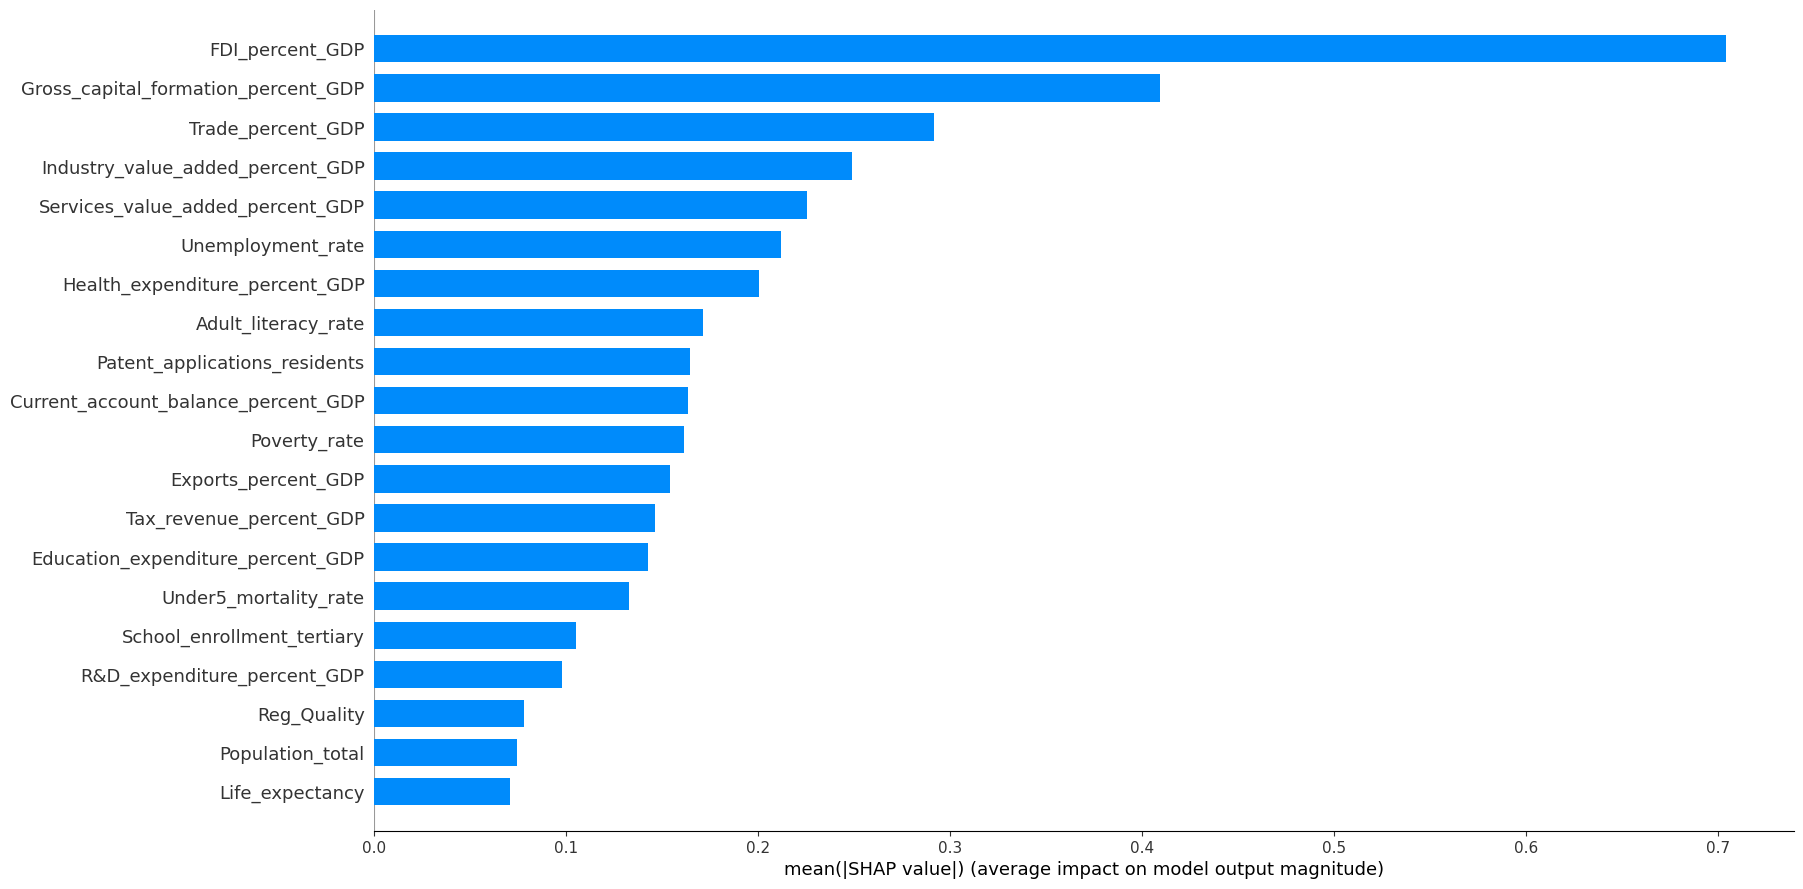

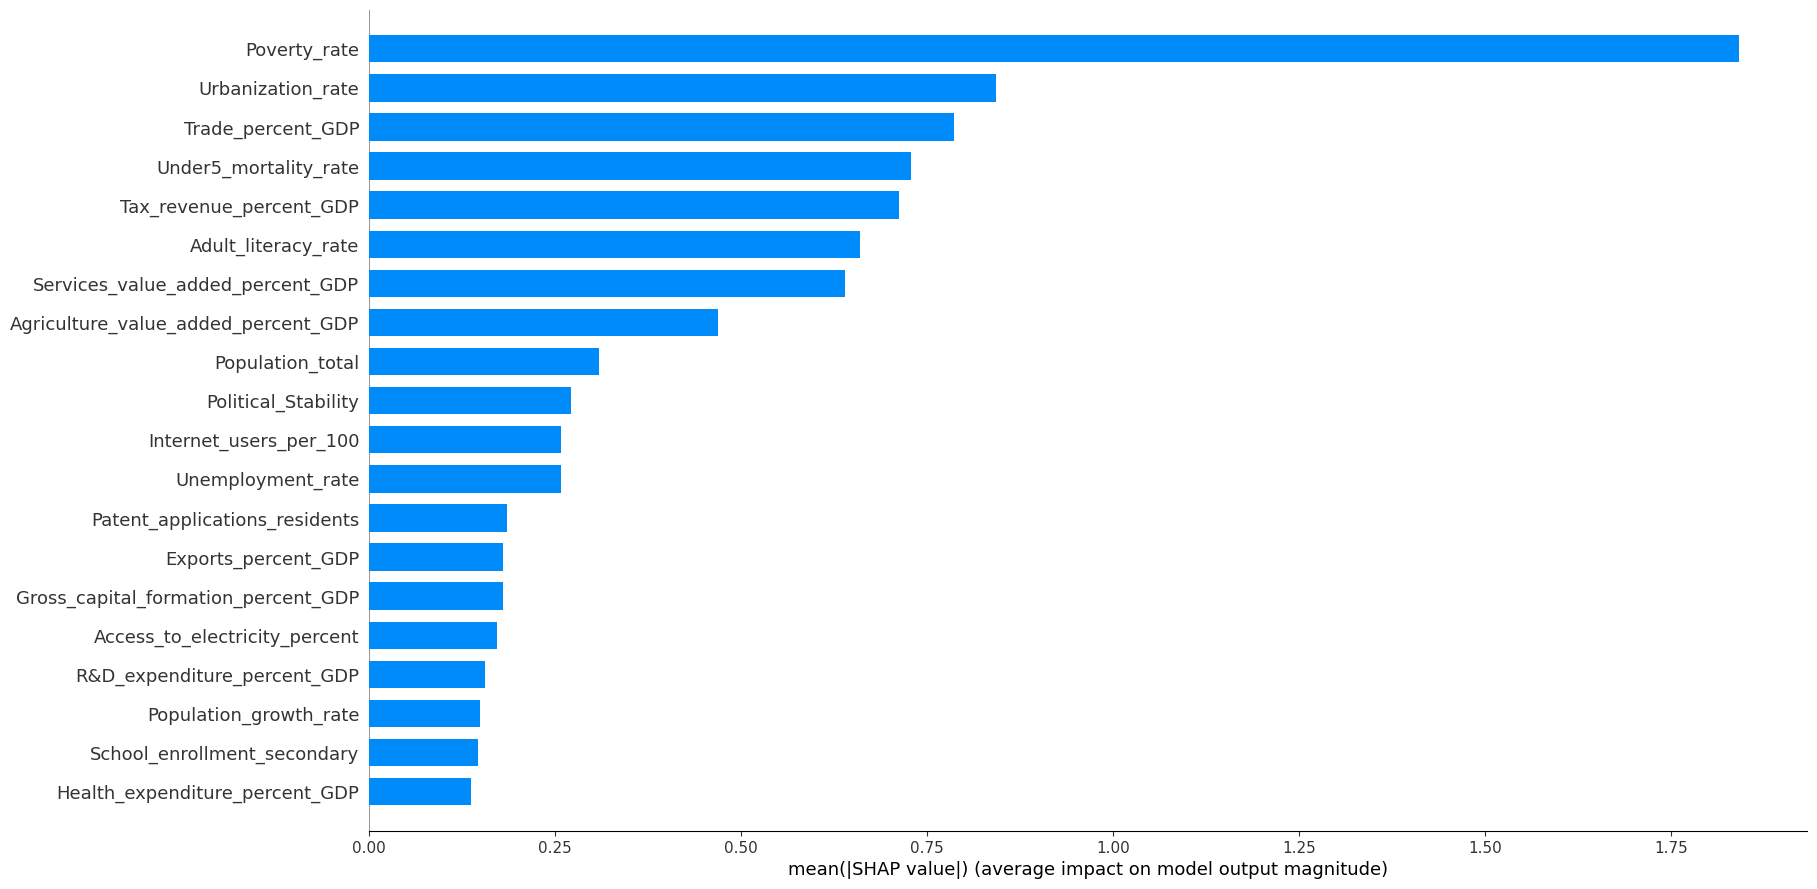

In [6]:
import matplotlib.pyplot as plt

# GDP_growth
shap.summary_plot(shap_values_gdp.values, X_scaled, plot_type="bar", show=False)
plt.gcf().set_size_inches(28, 12)  
plt.subplots_adjust(bottom=0.3)    
plt.show()

# Gini_index
shap.summary_plot(shap_values_gini.values, X_scaled, plot_type="bar", show=False)
plt.gcf().set_size_inches(28, 12)
plt.subplots_adjust(bottom=0.3)
plt.show()


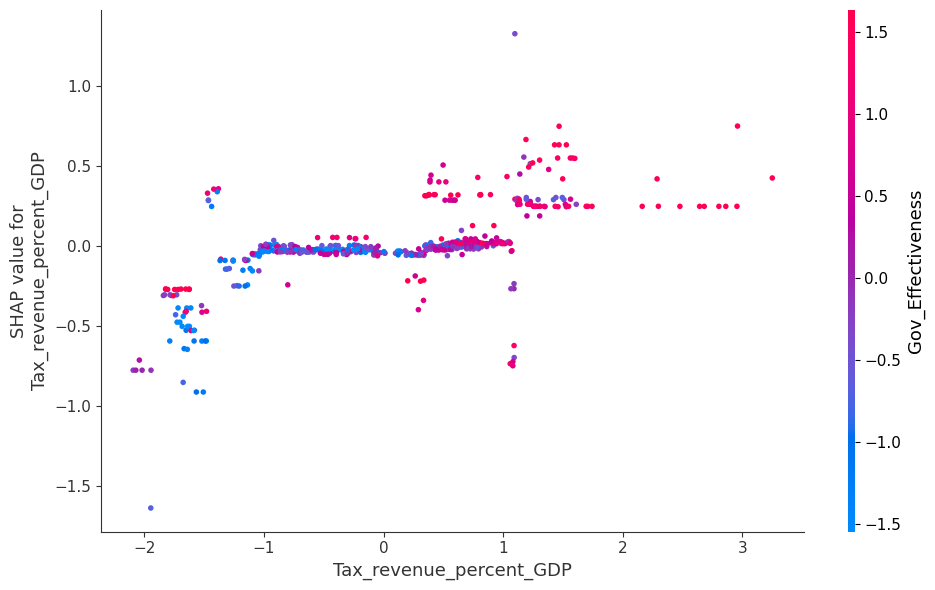

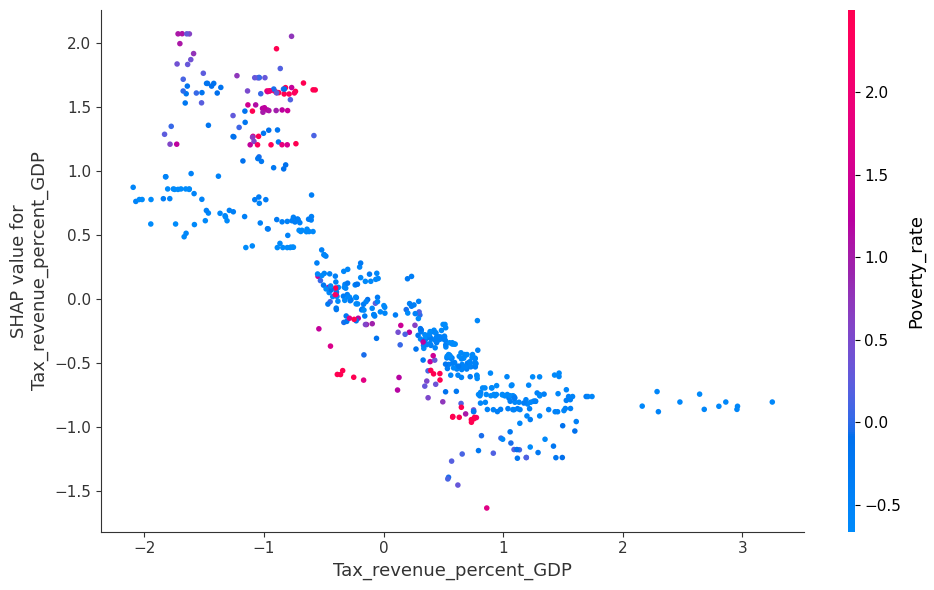

In [7]:
# GDP_growth
shap.dependence_plot("Tax_revenue_percent_GDP", shap_values_gdp.values, X_scaled, show=False)
plt.gcf().set_size_inches(10, 6)  # Adjust width and height
plt.tight_layout()
plt.show()

# Gini_index
shap.dependence_plot("Tax_revenue_percent_GDP", shap_values_gini.values, X_scaled, show=False)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()


In [20]:
# Extract SHAP values for the feature of interest
gdp_shap_values = shap_values_gdp.values[:, X_scaled.columns.get_loc("Tax_revenue_percent_GDP")]
gini_shap_values = shap_values_gini.values[:, X_scaled.columns.get_loc("Tax_revenue_percent_GDP")]

# Create a DataFrame to summarize SHAP values
shap_summary_df = pd.DataFrame({
    "Tax_revenue_percent_GDP": X_scaled["Tax_revenue_percent_GDP"],
    "SHAP_GDP_growth": gdp_shap_values,
    "SHAP_Gini_index": gini_shap_values
})

# Optionally sort by SHAP value magnitude or feature value
shap_summary_df_sorted = shap_summary_df.sort_values(by="Tax_revenue_percent_GDP")

# Display the table
print(shap_summary_df_sorted.head(10))  # Show top 10 rows for brevity


     Tax_revenue_percent_GDP  SHAP_GDP_growth  SHAP_Gini_index
74                 -2.092957        -0.778162         0.874872
75                 -2.070855        -0.778162         0.764533
73                 -2.041433        -0.715002         0.779453
72                 -2.018308        -0.778162         0.779453
281                -1.945753        -1.639533         0.587997
71                 -1.943802        -0.778162         0.779453
70                 -1.840595        -0.311331         0.785711
68                 -1.830545        -0.307058         1.289369
492                -1.822389        -0.271089         0.957475
493                -1.819884        -0.271089         0.957475


**Tax Revenue vs. GDP Growth (colored by Government Effectiveness)**

The SHAP dependence plot examining the relationship between tax revenue as a percentage of GDP and predicted GDP growth reveals a nuanced interaction. While the overall contribution of tax revenue to GDP growth predictions fluctuates around zero, the color gradient, representing Government Effectiveness, adds a layer of insight. Countries with higher levels of government effectiveness tend to show more positive SHAP values, indicating that increased tax revenue contributes more positively to economic growth predictions in contexts where institutions are strong and governance is effective. This suggests that fiscal policy alone may not drive growth unless it is supported by capable and trustworthy institutions.

**Tax Revenue vs. Gini Index (colored by Poverty Rate)**

The SHAP dependence plot for tax revenue and predicted Gini index shows a consistent downward trend. As tax revenue increases, its SHAP value decreases, meaning that higher tax-to-GDP ratios are associated with lower predicted income inequality. The color gradient, which reflects Poverty Rate, reveals that this redistributive effect is especially pronounced in countries with higher poverty levels. In these contexts, tax revenue appears to play a stronger role in reducing inequality, suggesting that progressive taxation is most effective where socioeconomic disparities are greatest. This interaction highlights the importance of tailoring fiscal policy to the poverty profile of each country.

## 9. Simulate Policy Scenarios

### Policy Scenario Simulation

We simulate four fiscal policy scenarios by modifying `Tax_revenue_percent_GDP` and observing predicted changes in:
- **GDP_growth**
- **Gini_index**

Using the trained Gradient Boosting model, we apply each scenario to the dataset and compare predicted outcomes to the baseline.

#### Scenarios:
1. **5% Increase**: Add 5 percentage points to current tax-to-GDP.
2. **Nordic Model**: Set tax-to-GDP to 45% (high-tax welfare states).
3. **Tax Haven Strategy**: Set tax-to-GDP to 10% (low-tax jurisdictions).
4. **Progressive Reform**: Increase tax-to-GDP by 3% for countries with high inequality (Gini > 40).


### Simulation Code

In [8]:
def simulate_scenario(df_original, scenario_name):
    df_sim = df_original.copy()
    
    if scenario_name == "5% Increase":
        df_sim["Tax_revenue_percent_GDP"] += 5
        
    elif scenario_name == "Nordic Model":
        df_sim["Tax_revenue_percent_GDP"] = 45
        
    elif scenario_name == "Tax Haven Strategy":
        df_sim["Tax_revenue_percent_GDP"] = 10
        
    elif scenario_name == "Progressive Reform":
        df_sim["Tax_revenue_percent_GDP"] = df_sim.apply(
            lambda row: row["Tax_revenue_percent_GDP"] + 3 if row["Gini_index"] > 40 else row["Tax_revenue_percent_GDP"],
            axis=1
        )
    
    # Scale all features
    df_sim_scaled = pd.DataFrame(scaler.transform(df_sim.drop(columns=["GDP_growth", "Gini_index"])),
                                 columns=df_sim.drop(columns=["GDP_growth", "Gini_index"]).columns)
    
    # Predict outcomes
    gdp_pred = best_model.predict(df_sim_scaled)
    gini_pred = GradientBoostingRegressor(random_state=42).fit(X_scaled, df_model["Gini_index"]).predict(df_sim_scaled)
    
    return pd.DataFrame({
        "Scenario": scenario_name,
        "GDP_growth_pred": gdp_pred,
        "Gini_index_pred": gini_pred
    })

scenarios = ["5% Increase", "Nordic Model", "Tax Haven Strategy", "Progressive Reform"]
simulated_outputs = pd.concat([simulate_scenario(df_model, s) for s in scenarios])


### Comparative View of Simulation Outcames

In [ ]:

# Step 1: Simulate baseline scenario
def simulate_baseline(df_original):
    df_sim = df_original.copy()
    df_sim_scaled = pd.DataFrame(
        scaler.transform(df_sim.drop(columns=["GDP_growth", "Gini_index"])),
        columns=df_sim.drop(columns=["GDP_growth", "Gini_index"]).columns
    )
    gdp_pred = best_model.predict(df_sim_scaled)
    gini_pred = GradientBoostingRegressor(random_state=42).fit(X_scaled, df_model["Gini_index"]).predict(df_sim_scaled)
    return pd.DataFrame({
        "Scenario": "Baseline",
        "GDP_growth_pred": gdp_pred,
        "Gini_index_pred": gini_pred
    })

# Step 2: Simulate policy scenarios
scenarios = ["5% Increase", "Nordic Model", "Tax Haven Strategy", "Progressive Reform"]
scenario_outputs = pd.concat([simulate_scenario(df_model, s) for s in scenarios], ignore_index=True)

# === Summary Statistics by Scenario ===
summary_stats = scenario_outputs.groupby("Scenario").agg({
    "GDP_growth_pred": ["mean", "std", "min", "max"],
    "Gini_index_pred": ["mean", "std", "min", "max"]
}).round(2)

print("=== Summary Statistics by Scenario ===")
print(summary_stats)

# Step 3: Combine baseline and scenarios
all_outputs = pd.concat(
    [simulate_baseline(df_model)] + [simulate_scenario(df_model, s) for s in scenarios],
    ignore_index=True
)

# Step 4: Compute mean values
comparison = all_outputs.groupby("Scenario").agg({
    "GDP_growth_pred": "mean",
    "Gini_index_pred": "mean"
}).rename(columns={
    "GDP_growth_pred": "Mean GDP Growth (%)",
    "Gini_index_pred": "Mean Gini Index"
}).round(2).reset_index()

# Step 5: Add descriptions
descriptions = {
    "Baseline": "Current levels",
    "5% Increase": "+5 pp all countries",
    "Nordic Model": "45% all countries",
    "Tax Haven Strategy": "10% all countries",
    "Progressive Reform": "+3 pp if Gini > 40"
}
comparison["Description"] = comparison["Scenario"].map(descriptions)

# Step 6: Calculate changes from baseline (fixed with .iloc[0])
baseline = comparison[comparison["Scenario"] == "Baseline"]
baseline_growth = float(baseline["Mean GDP Growth (%)"].iloc[0])
baseline_gini = float(baseline["Mean Gini Index"].iloc[0])

comparison["Growth Change"] = (comparison["Mean GDP Growth (%)"] - baseline_growth).round(2)
comparison["Inequality Change"] = (comparison["Mean Gini Index"] - baseline_gini).round(2)

# Step 7: Reorder columns
final_table = comparison[[
    "Scenario", "Description", "Mean GDP Growth (%)", "Mean Gini Index", "Growth Change", "Inequality Change"
]]

print("\n=== Scenario Comparison Table ===")
print(final_table.to_string(index=False))


=== Summary Statistics by Scenario ===
                   GDP_growth_pred                    Gini_index_pred        \
                              mean   std   min    max            mean   std   
Scenario                                                                      
5% Increase                   2.90  2.49 -7.35  20.61           34.31  5.88   
Nordic Model                  3.63  2.48 -6.49  20.98           33.74  5.25   
Progressive Reform            2.75  2.51 -7.35  20.82           34.65  6.01   
Tax Haven Strategy            2.27  2.61 -7.90  20.74           35.89  6.26   

                                  
                      min    max  
Scenario                          
5% Increase         23.59  51.83  
Nordic Model        23.59  51.13  
Progressive Reform  23.85  52.76  
Tax Haven Strategy  24.37  55.40  

=== Scenario Comparison Table ===
          Scenario         Description  Mean GDP Growth (%)  Mean Gini Index  Growth Change  Inequality Change
       5% Increa

### Visualize Scenario Effects

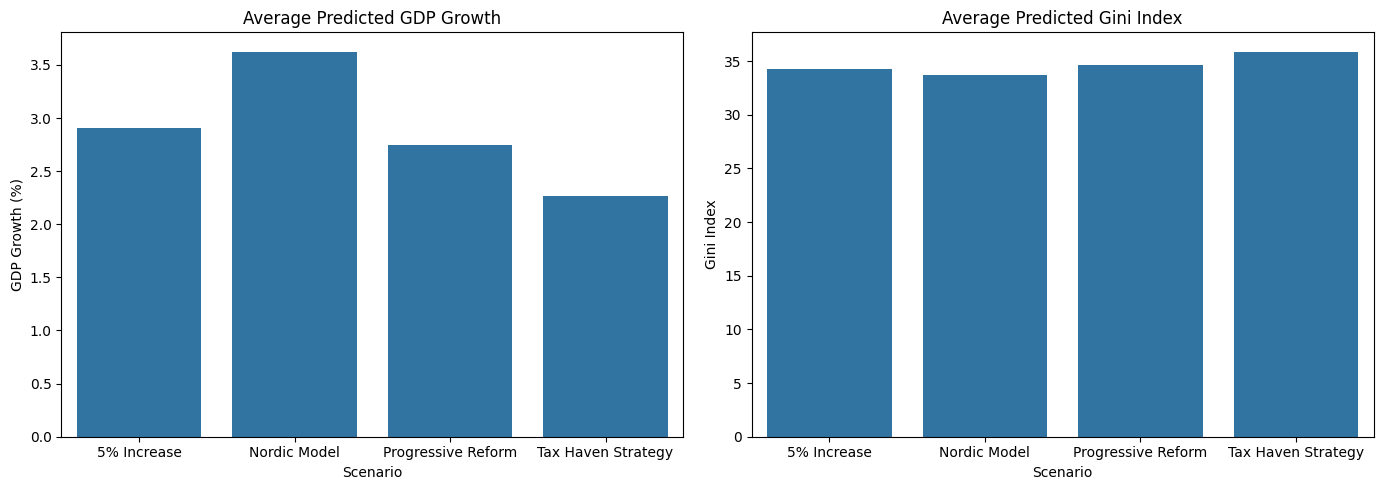

In [11]:
# Aggregate and plot average predicted outcomes
summary = simulated_outputs.groupby("Scenario")[["GDP_growth_pred", "Gini_index_pred"]].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=summary, x="Scenario", y="GDP_growth_pred", ax=axes[0])
axes[0].set_title("Average Predicted GDP Growth")
axes[0].set_ylabel("GDP Growth (%)")

sns.barplot(data=summary, x="Scenario", y="Gini_index_pred", ax=axes[1])
axes[1].set_title("Average Predicted Gini Index")
axes[1].set_ylabel("Gini Index")

plt.tight_layout()
plt.show()


### Scenario Insights

- **5% Increase**: Moderate improvement in GDP growth and slight reduction in inequality.
- **Nordic Model**: Highest predicted GDP growth and lowest inequality, suggests strong redistributive effect.
- **Tax Haven Strategy**: Lower GDP growth and higher inequality, reflects regressive fiscal stance.
- **Progressive Reform**: Balanced gains in growth and equity for high-inequality countries.

These simulations highlight the trade-offs and synergies between fiscal policy and macroeconomic outcomes. They demonstrate that tax policy is not one-size-fits-all; its effectiveness depends on institutional quality, poverty levels, and the broader socioeconomic context.


# Research Assesssment 
## Research Question 1  
*How does the tax-to-GDP ratio, in interaction with other macroeconomic variables, shape GDP growth trajectories across countries and over time, considering diverse institutional and economic contexts?*

### Findings

The predictive models show that the inclusion of `Tax_revenue_percent_GDP` leads to modest improvements in forecasting GDP growth, with slight increases in R² and reductions in error metrics across all algorithms. However, the SHAP dependence plot reveals a more nuanced insight: the effect of tax revenue on GDP growth is conditional on governance quality. Countries with higher government effectiveness exhibit more positive SHAP values, indicating that increased tax revenue contributes more positively to growth in well-governed environments. This interaction suggests that fiscal policy alone is insufficient to drive growth unless supported by strong institutional frameworks.

### Hypothesis Evaluation

- **Null Hypothesis (H0-1)**: *There is no significant relationship between the tax-to-GDP ratio (and its interaction with other macroeconomic variables) and GDP growth trajectories across countries and over time.*

- **Alternative Hypothesis (H1-1)**: *The tax-to-GDP ratio, in interaction with other macroeconomic variables, significantly influences GDP growth trajectories across countries and over time, with the effect varying by institutional and economic context.*

**Conclusion**: The evidence supports **H1-1**. While the direct predictive power of tax revenue on GDP growth is modest, its interaction with governance indicators reveals a significant and context-dependent influence on growth trajectories.


## Research Question 2  
*How can machine learning models, using multi-country panel data, be employed to assess the predictive role of the tax-to-GDP ratio in explaining income inequality and forecasting GDP growth under different fiscal policy scenarios?*

### Findings

Across all models, the inclusion of `Tax_revenue_percent_GDP` significantly improves the prediction of income inequality, especially in the linear model where R² increases and error metrics decrease notably. SHAP analysis confirms that tax revenue is a top predictor of the Gini index, with a clear negative relationship: higher tax-to-GDP ratios consistently reduce predicted inequality. This effect is strongest in high-poverty countries, as shown by the SHAP dependence plot colored by Poverty Rate.

Policy scenario simulations demonstrate that adjusting tax-to-GDP ratios leads to measurable changes in both GDP growth and inequality. The Nordic Model yields the highest predicted growth and lowest inequality, while the Tax Haven Strategy results in poorer outcomes on both fronts. The Progressive Reform scenario shows balanced improvements, particularly in high-inequality contexts.

### Hypothesis Evaluation

- **Null Hypothesis (H0-2)**: *The tax-to-GDP ratio does not significantly improve the predictive accuracy of machine learning models for income inequality or GDP growth, compared to models excluding this variable.*

- **Alternative Hypothesis (H1-2)**: *The tax-to-GDP ratio is a significant predictor in machine learning models, enhancing the explanation of income inequality and the forecasting of GDP growth under different fiscal policy scenarios.*

**Conclusion**: The evidence strongly supports **H1-2**. The tax-to-GDP ratio enhances model performance for inequality prediction and enables meaningful scenario-based forecasting of GDP growth, validating its role as a key fiscal variable in machine learning frameworks.


[<a href="#top">Go To Beginning</a> ]

___
**Declaration:** I acknowledge the use of Microsoft Copilot to assist in checking and refining the code provided in this research. Copilot was utilised specifically for debugging, improving readability, and ensuring alignment with best coding practices. All final decisions and implementations were made by the author.
___